In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv("/content/ins.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
X = data[["age", "bmi", "children", "sex", "smoker", "region"]]
X


,age,bmi,children,sex,smoker,region
0,19,27.900,0,female,yes,southwest
1,18,33.770,1,male,no,southeast
2,28,33.000,3,male,no,southeast
3,33,22.705,0,male,no,northwest
4,32,28.880,0,male,no,northwest
...,...,...,...,...,...,...
1333,50,30.970,3,male,no,northwest
1334,18,31.920,0,female,no,northeast
1335,18,36.850,0,female,no,southeast
1336,21,25.800,0,female,no,southwest


In [13]:
y = data["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
all_columns         = list(data)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

In [20]:
print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region', 'charges']


In [21]:
data.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [22]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [23]:
from scipy.stats import kurtosis, skew, stats

In [25]:
print("missing charges values: {}".format(data['charges'].isnull().sum()))
print("missing smoker values: {}".format(data['smoker'].isnull().sum()))

missing charges values: 0
missing smoker values: 0


In [26]:
print("skew:  {}".format(skew(data['charges'])))
print("kurtosis:  {}".format(kurtosis(data['charges'])))

skew:  1.5141797118745743
kurtosis:  1.595821363956751


we are geting the positive skewness so the mean and median will be greater then mode


(Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution which means that data are light-tailed or lack of outliers.

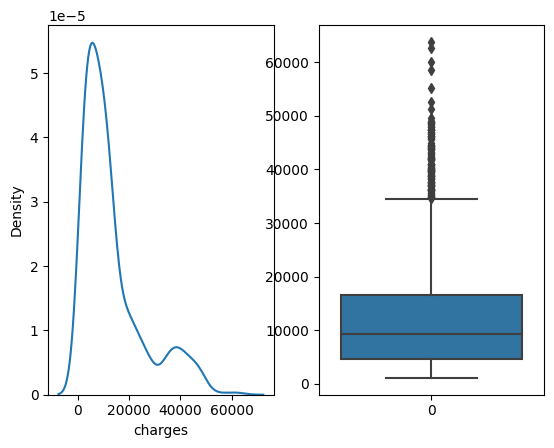

In [27]:
f, axes = plt.subplots(1, 2)
sns.kdeplot(data['charges'], ax=axes[0])
sns.boxplot(data['charges'], ax=axes[1])
plt.show()

<Axes: ylabel='Frequency'>

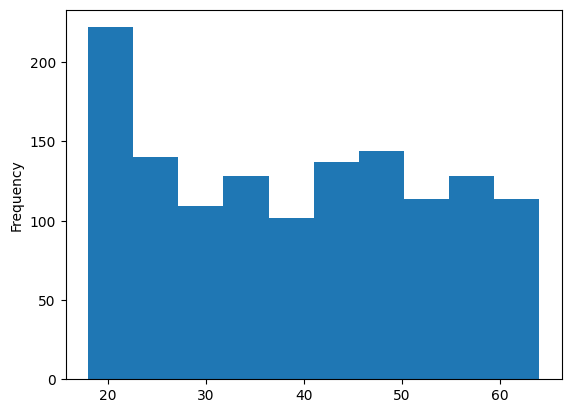

In [28]:
data.age.plot(kind="hist")

In [29]:
data.smoker.count()

1338

Text(0, 0.5, 'count')

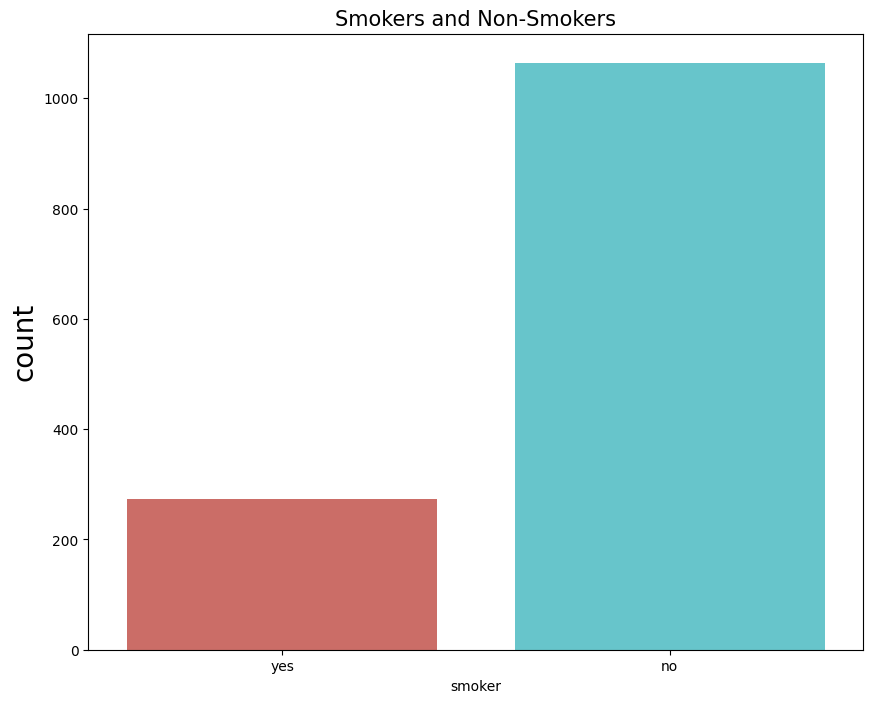

In [33]:
plt.figure(figsize = (10,8))
g = sns.countplot(x="smoker",data=data,palette='hls')
g.set_title("Smokers and Non-Smokers", fontsize=15)
g.set_xlabel("smoker", fontsize=10)
g.set_ylabel("count", fontsize=20)

Text(0, 0.5, 'count')

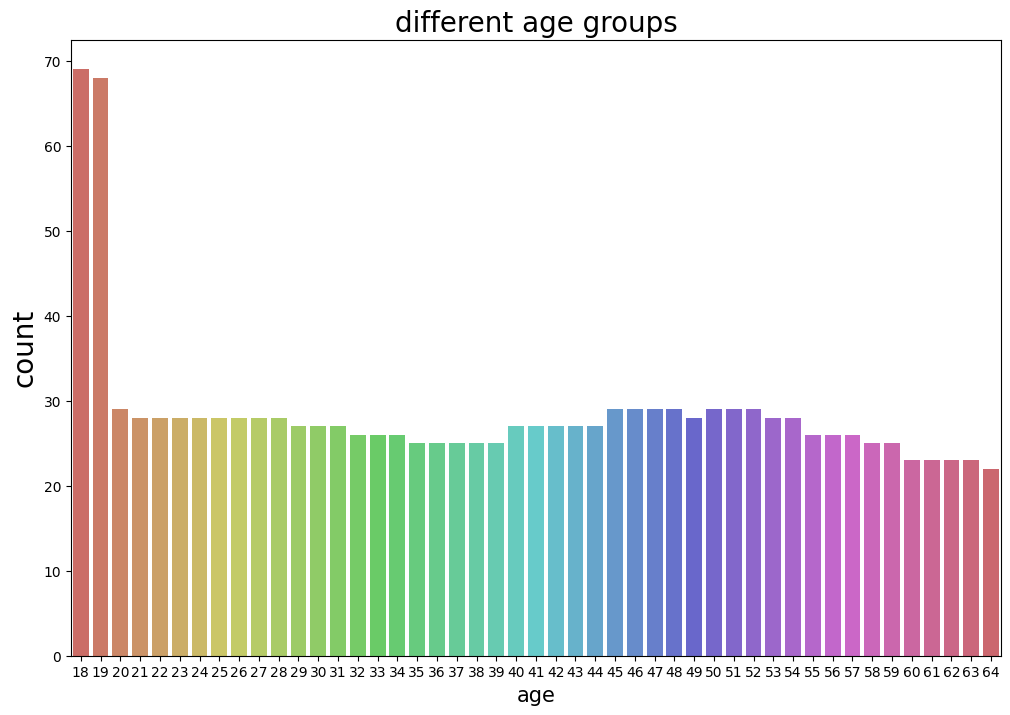

In [34]:
plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=data,palette='hls')
g.set_title("different age groups", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

<ipython-input-35-3ec4cefc3bec>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(data["bmi"])


Text(0.5, 1.0, 'Frequency Distribuition- bmi')

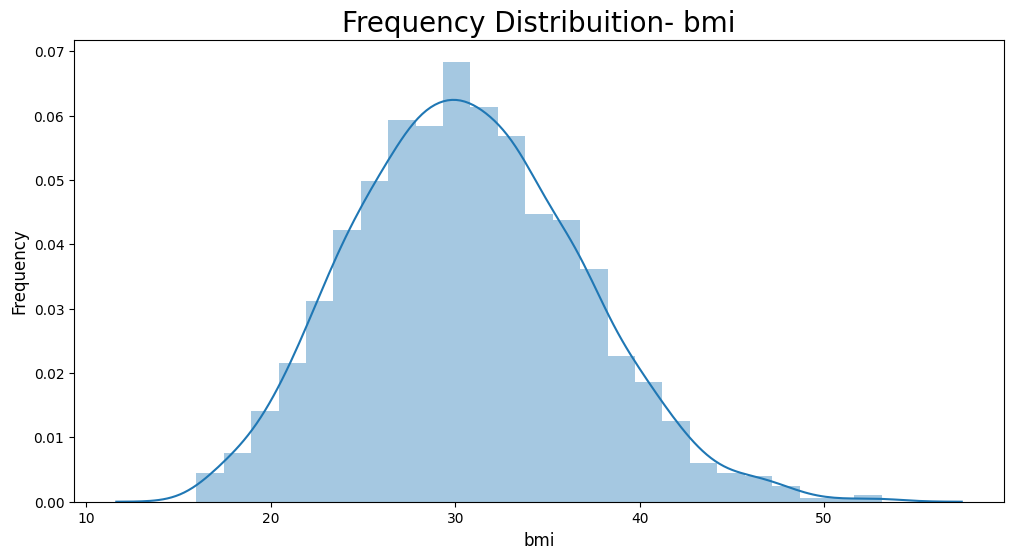

In [35]:
plt.figure(figsize=(12,6))
g = sns.distplot(data["bmi"])
g.set_xlabel("bmi", fontsize=12)
g.set_ylabel("Frequency", fontsize=12)
g.set_title("Frequency Distribuition- bmi", fontsize=20)

<Axes: ylabel='Frequency'>

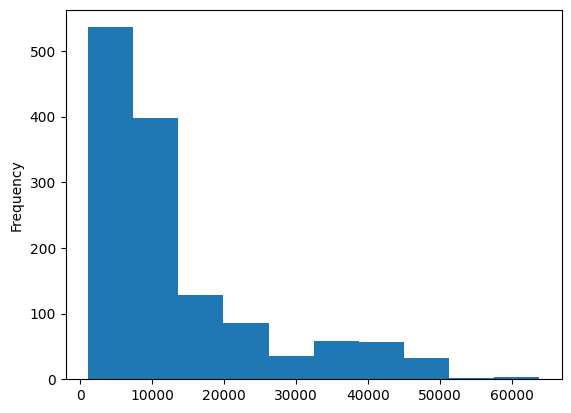

In [40]:
data.charges.plot(kind="hist")

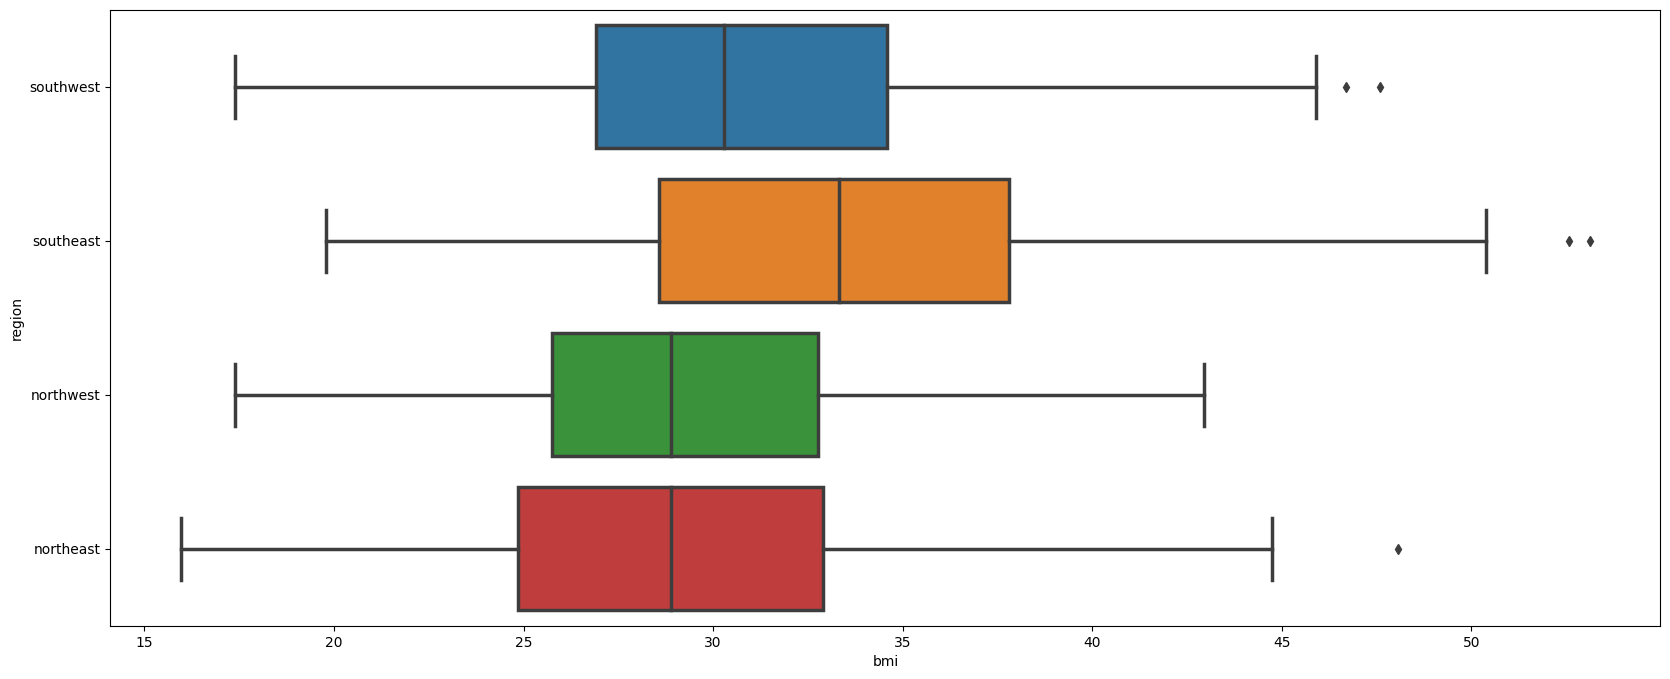

In [42]:
plt.figure(figsize = (20,8))
ax = sns.boxplot(x="bmi" ,y="region", data=data, linewidth=2.5)
plt.show()

<Axes: ylabel='region'>

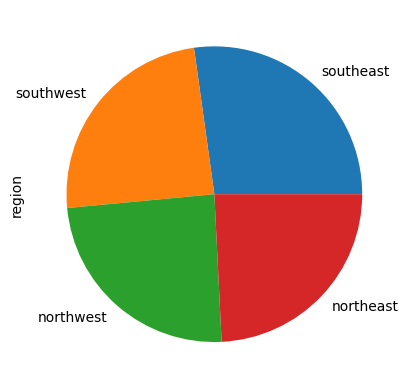

In [44]:
data.region.value_counts().plot(kind="pie")

<Axes: xlabel='bmi', ylabel='charges'>

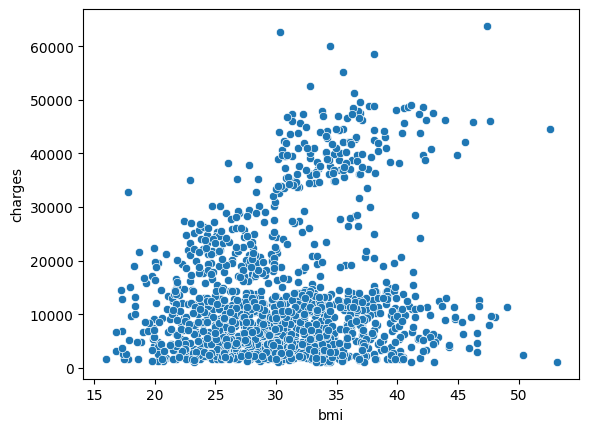

In [45]:
sns.scatterplot(x=data['bmi'], y=data['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

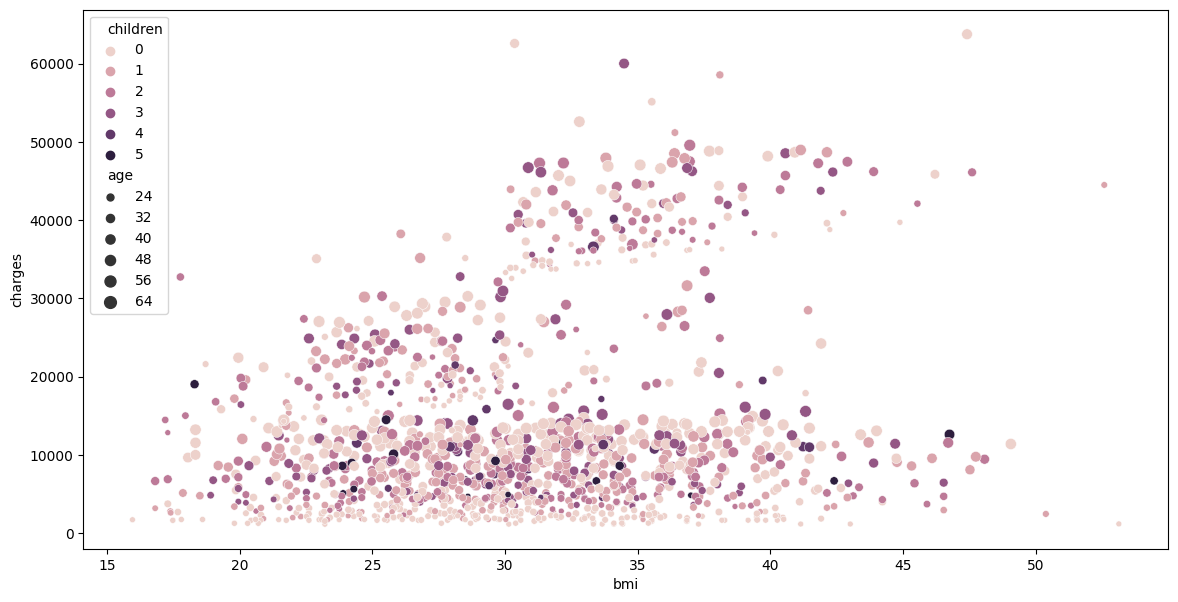

In [46]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data['bmi'], y=data['charges'],hue=data['children'],size=data['age'])

<Axes: xlabel='age', ylabel='charges'>

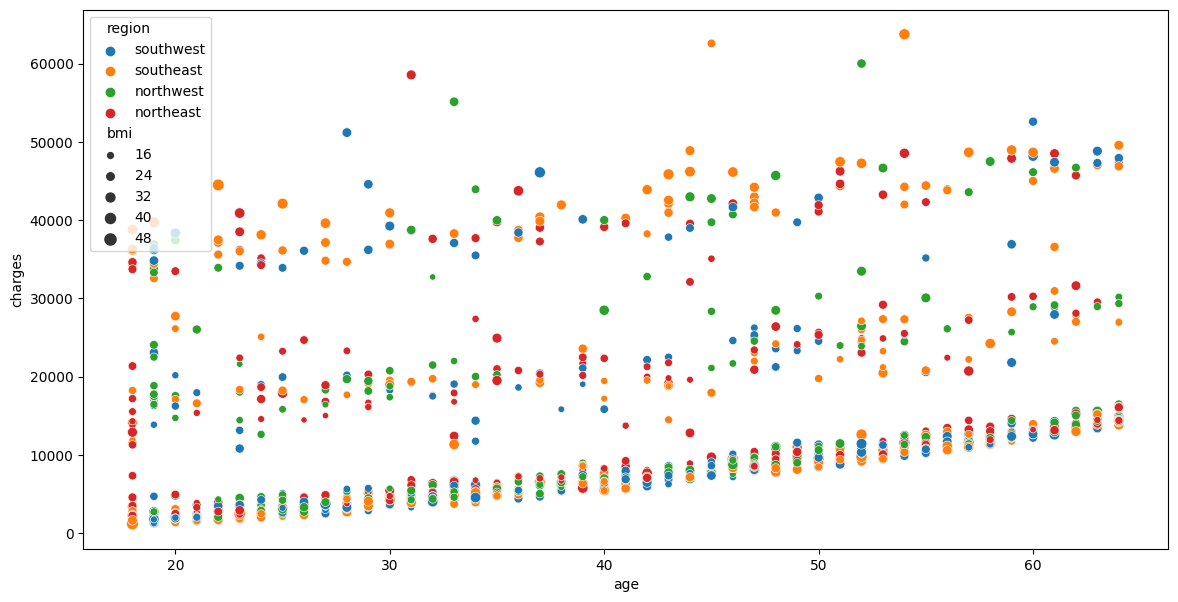

In [47]:
plt.figure(figsize=(14, 7))
sns.scatterplot(x=data['age'], y=data['charges'],hue=data['region'],size=data['bmi'])

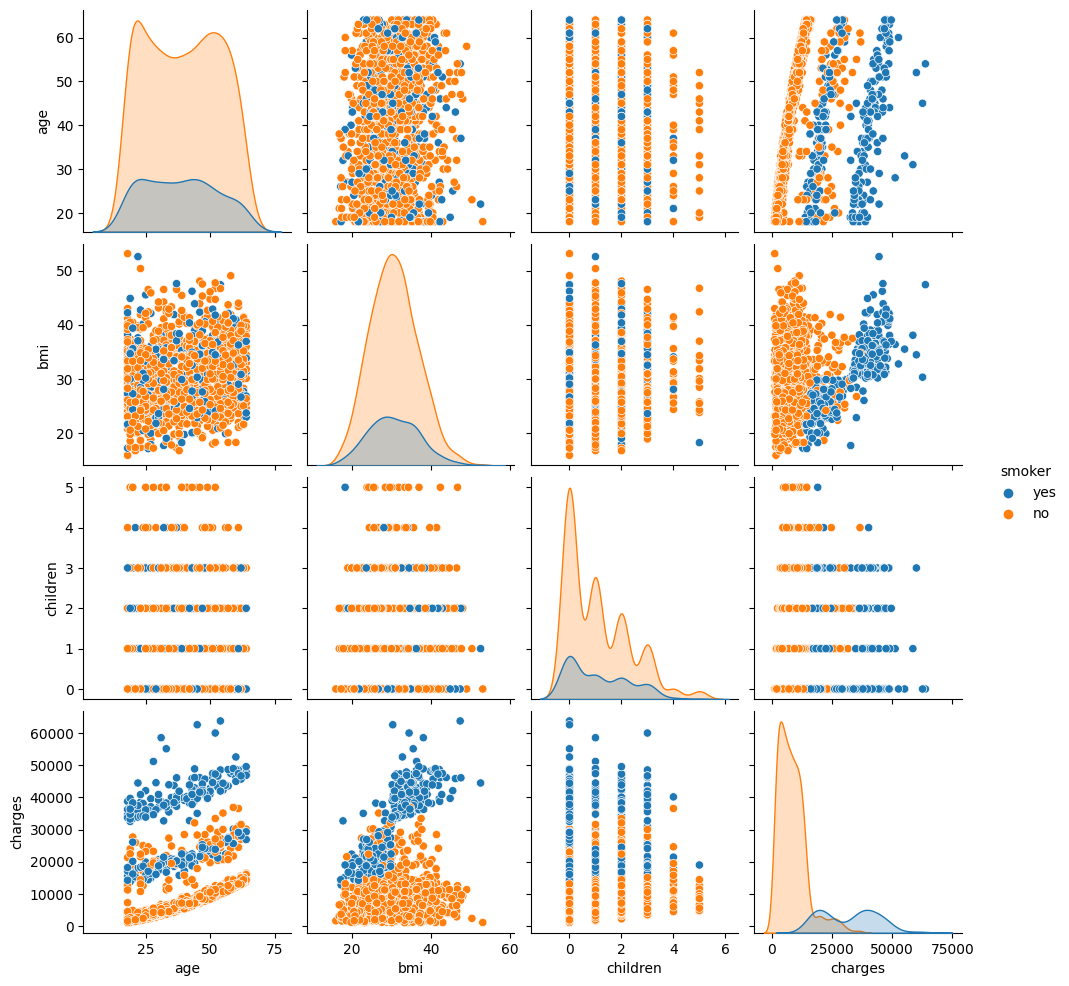

In [48]:
sns.pairplot(data=data,hue='smoker')

<Axes: xlabel='bmi', ylabel='charges'>

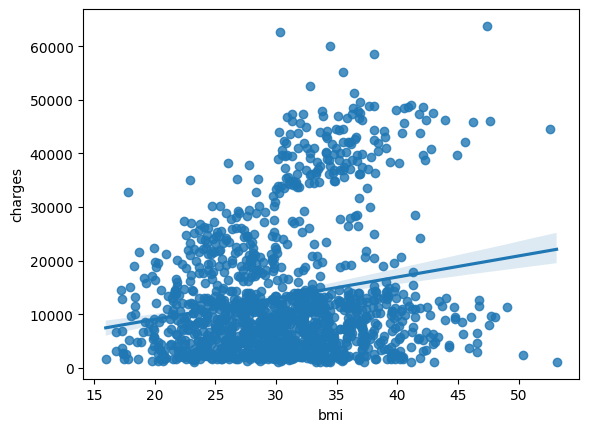

In [49]:
sns.regplot(x=data['bmi'], y=data['charges'])

<Axes: xlabel='bmi', ylabel='charges'>

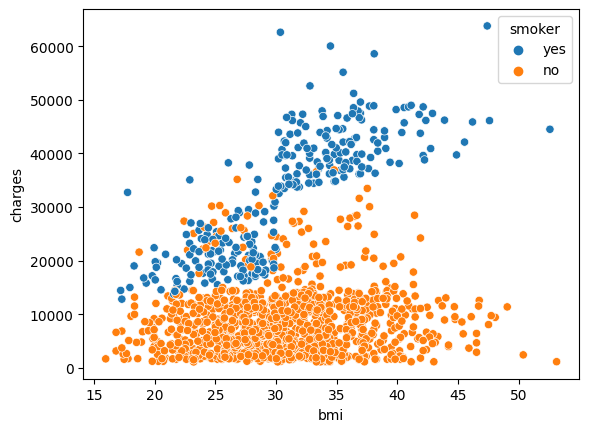

In [50]:
sns.scatterplot(x=data['bmi'], y=data['charges'], hue=data['smoker'])

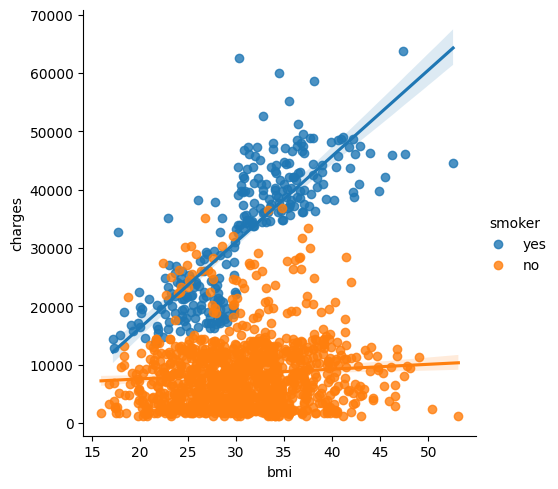

In [53]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=data)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


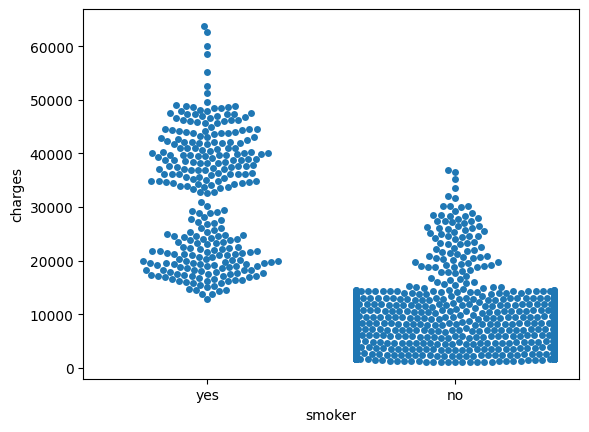

In [55]:
sns.swarmplot(x=data['smoker'],
              y=data['charges'])

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [61]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=1234)